# Algorithm Performance Data Analysis - Run 3

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 80 | 0 | 
| max | 120 | 0.0010 | 
| step| 1 | 0.0001 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## Run3 
data = pd.read_csv('IndividualCompressionData_since_test_20231102_190518.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_190518,10404007.png,502730,148024,354706,0.705560,13,14,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0000
1,2,test_20231102_190518,1254659.png,342646,175949,166697,0.486499,11,9,0,0,0,0.0,12.540334,1190.506336,17.373486,80,0.0000
2,3,test_20231102_190518,10188041.png,221231,25861,195370,0.883104,4,4,0,0,0,0.0,7.587872,480.758741,21.311532,80,0.0000
3,4,test_20231102_190518,10287332.png,216980,25891,191089,0.880676,1,5,0,0,0,0.0,8.055694,492.245184,21.208989,80,0.0000
4,5,test_20231102_190518,11610969.png,368720,93499,275221,0.746423,3,4,0,0,0,0.0,13.322535,1203.877355,17.324981,80,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,6,test_20231102_190838,10350842.png,212614,7159,205455,0.966329,1,4,0,0,0,0.0,18.742366,2242.411195,14.623651,120,0.0009
4096,7,test_20231102_190838,10863862.png,317432,15209,302223,0.952087,2,3,0,0,0,0.0,23.119511,3072.671941,13.255642,120,0.0009
4097,8,test_20231102_190838,11382381.png,312486,839,311647,0.997315,2,3,0,0,0,0.0,21.358711,2440.977456,14.255166,120,0.0009
4098,9,test_20231102_190838,11079715.png,443815,132239,311576,0.702040,5,4,0,0,0,0.0,16.302612,1952.235056,15.225483,120,0.0009


## Analyze per Image

In [3]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [4]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231102_190518,10404007.png,502730,148024,354706,0.705560,13,14,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0000
10,1,test_20231102_190519,10404007.png,502730,148024,354706,0.705560,6,5,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0001
20,1,test_20231102_190519,10404007.png,502730,148024,354706,0.705560,4,5,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0002
30,1,test_20231102_190520,10404007.png,502730,148024,354706,0.705560,3,5,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0003
40,1,test_20231102_190520,10404007.png,502730,148024,354706,0.705560,3,5,0,0,0,0.0,20.147401,2080.375429,14.949386,80,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,1,test_20231102_190836,10404007.png,502730,27229,475501,0.945838,2,4,0,0,0,0.0,24.993056,3243.490411,13.020677,120,0.0005
4060,1,test_20231102_190837,10404007.png,502730,27109,475621,0.946076,2,3,0,0,0,0.0,25.005840,3245.697200,13.017724,120,0.0006
4070,1,test_20231102_190837,10404007.png,502730,26786,475944,0.946719,2,4,0,0,0,0.0,25.095884,3265.691739,12.991052,120,0.0007
4080,1,test_20231102_190838,10404007.png,502730,26244,476486,0.947797,2,3,0,0,0,0.0,25.131184,3274.403269,12.979482,120,0.0008


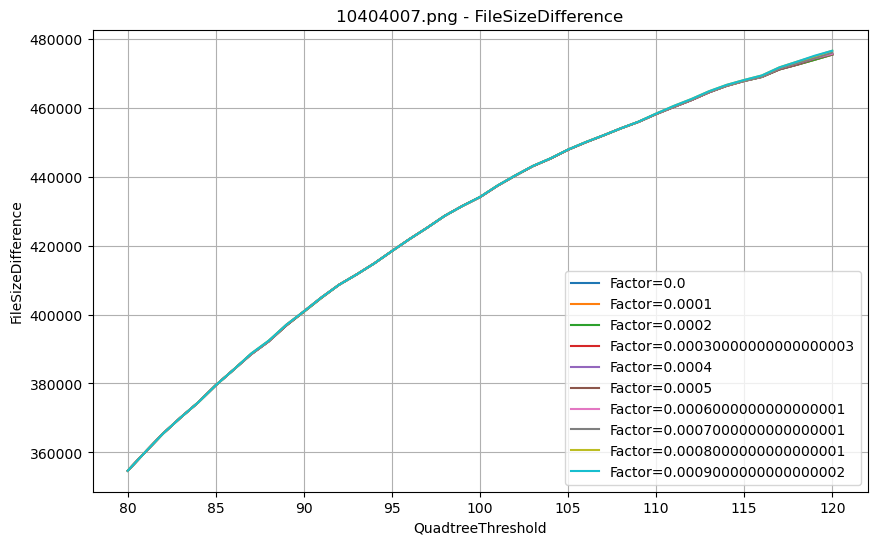

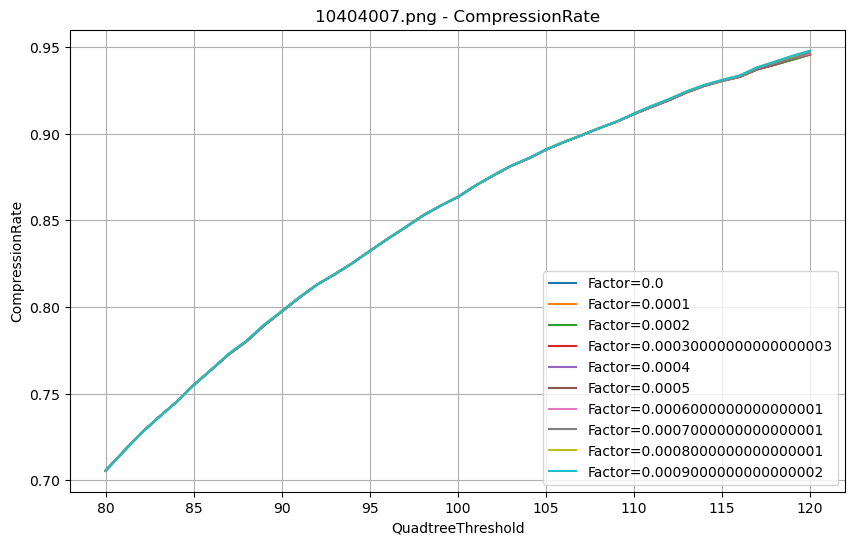

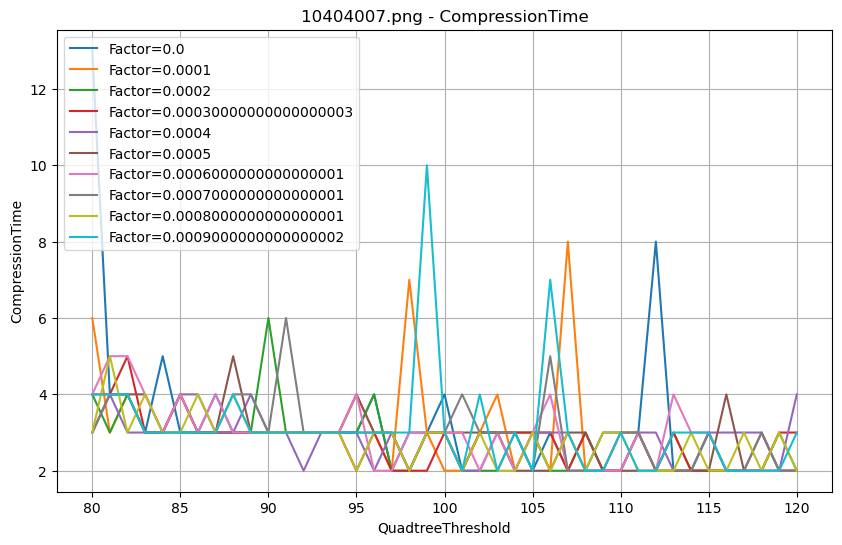

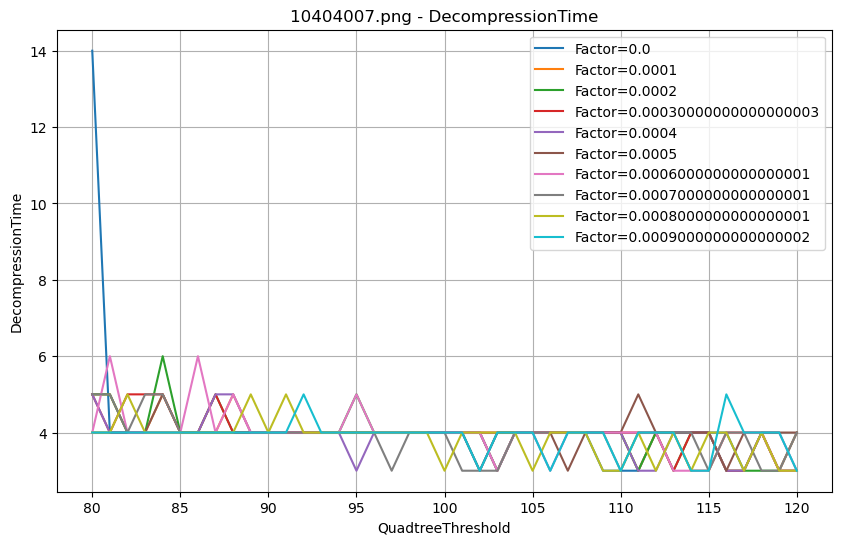

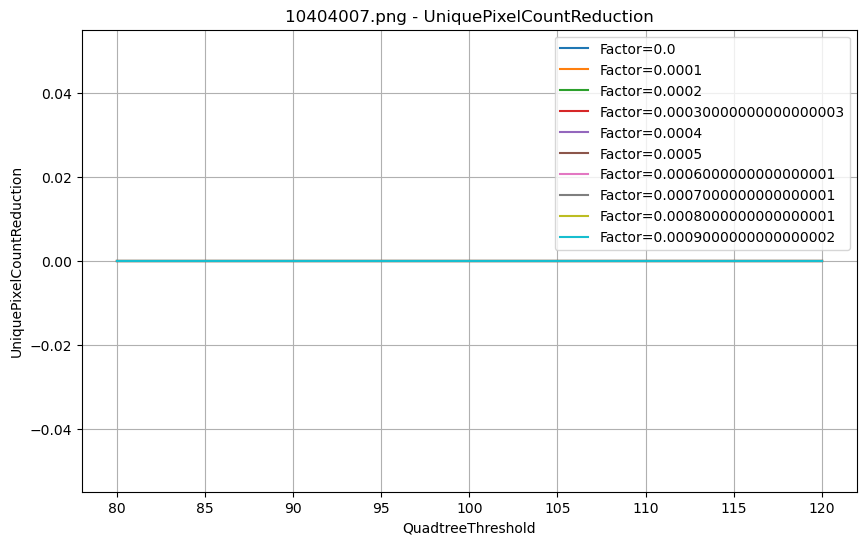

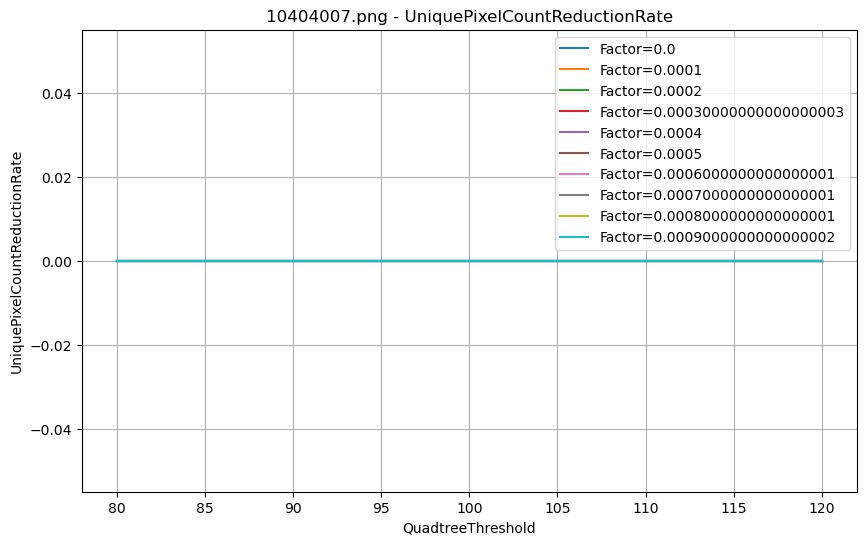

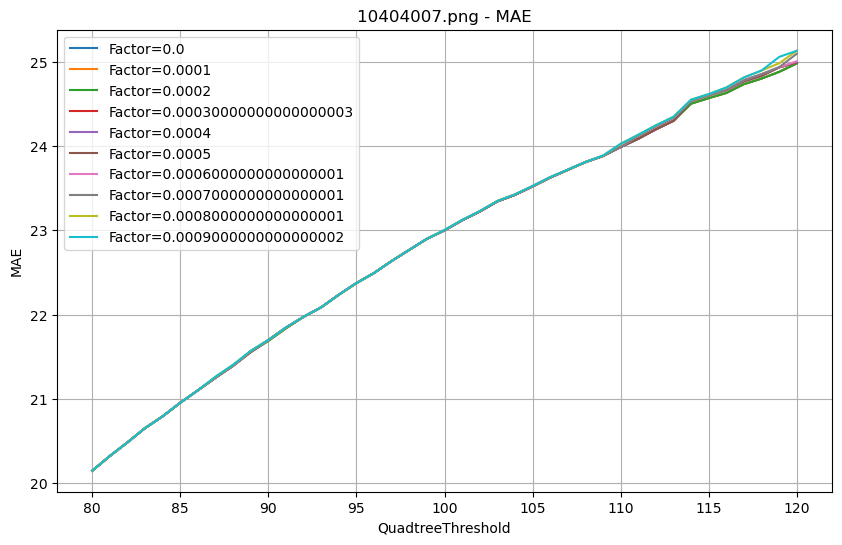

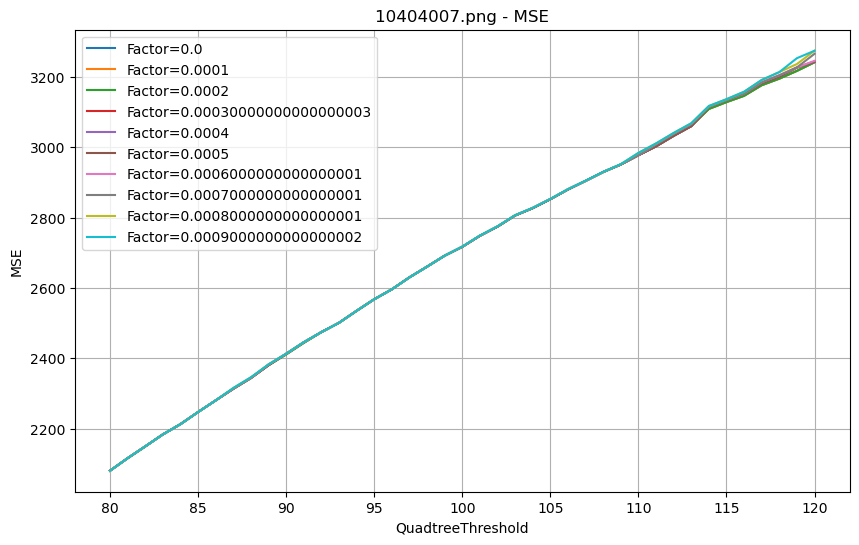

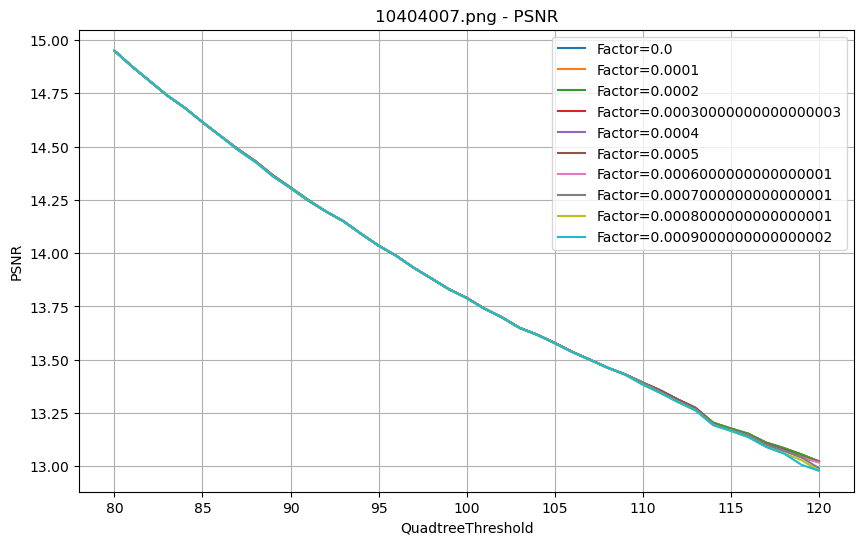

In [5]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [6]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_19798/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [7]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231102_190518,80,0.0000,5.5,321053.7,81832.8,239220.9,0.777228,4.4,5.9,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
1,test_20231102_190519,80,0.0001,5.5,321053.7,81832.8,239220.9,0.777228,3.1,4.1,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
2,test_20231102_190519,80,0.0002,5.5,321053.7,81832.8,239220.9,0.777228,3.0,4.2,0.0,0.0,0.0,0.0,12.415140,1048.892346,18.294494
3,test_20231102_190520,80,0.0003,5.5,321053.7,81812.8,239240.9,0.777297,2.6,4.1,0.0,0.0,0.0,0.0,12.445135,1052.884878,18.275692
4,test_20231102_190520,80,0.0004,5.5,321053.7,81812.8,239240.9,0.777297,2.9,4.0,0.0,0.0,0.0,0.0,12.445135,1052.884878,18.275692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,test_20231102_190836,120,0.0005,5.5,321053.7,32432.2,288621.5,0.911493,2.3,3.5,0.0,0.0,0.0,0.0,18.004436,2165.849061,15.171392
406,test_20231102_190837,120,0.0006,5.5,321053.7,32339.9,288713.8,0.911813,2.0,3.5,0.0,0.0,0.0,0.0,18.163988,2198.751336,15.101850
407,test_20231102_190837,120,0.0007,5.5,321053.7,32307.6,288746.1,0.911877,2.1,3.7,0.0,0.0,0.0,0.0,18.172993,2200.750790,15.099182
408,test_20231102_190838,120,0.0008,5.5,321053.7,32223.2,288830.5,0.912116,1.9,3.9,0.0,0.0,0.0,0.0,18.230500,2209.826037,15.079316


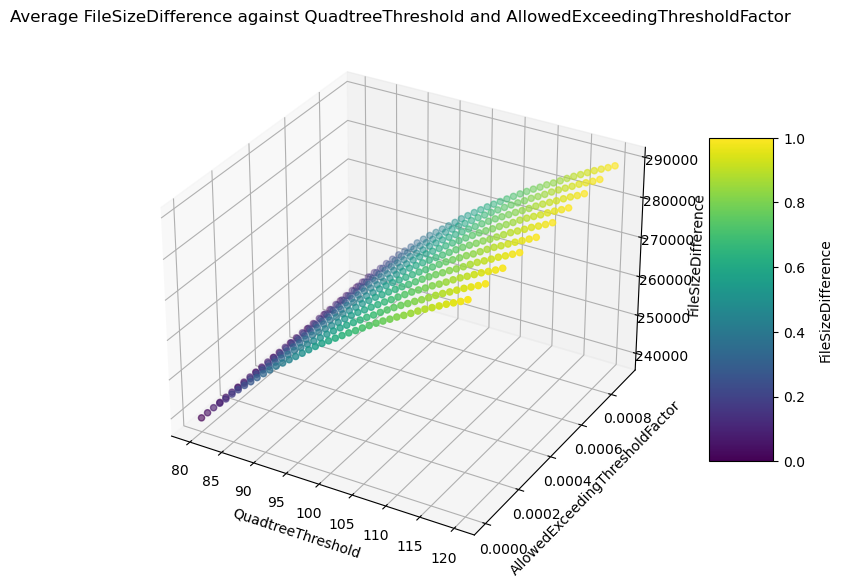

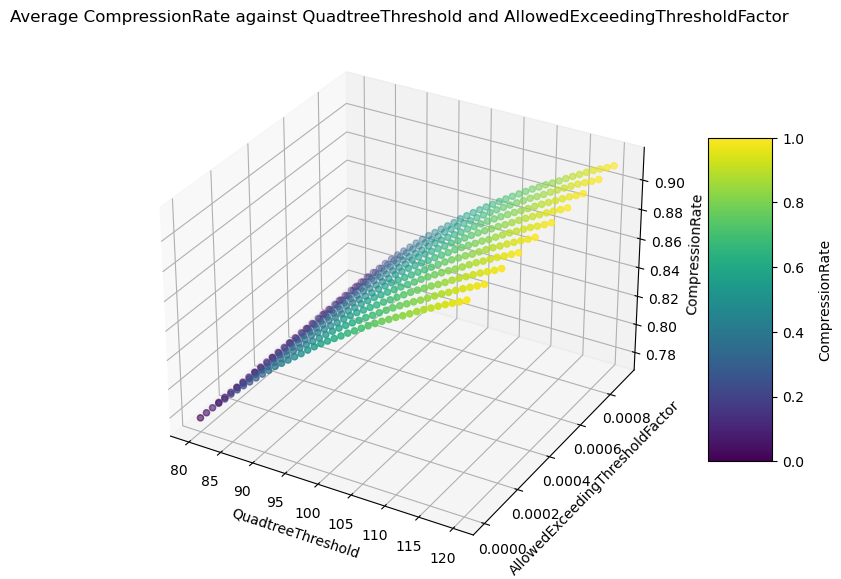

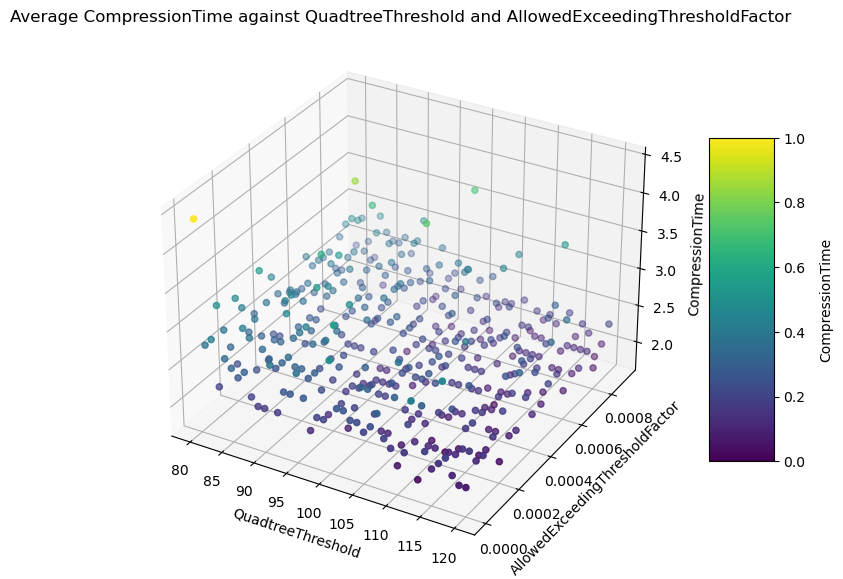

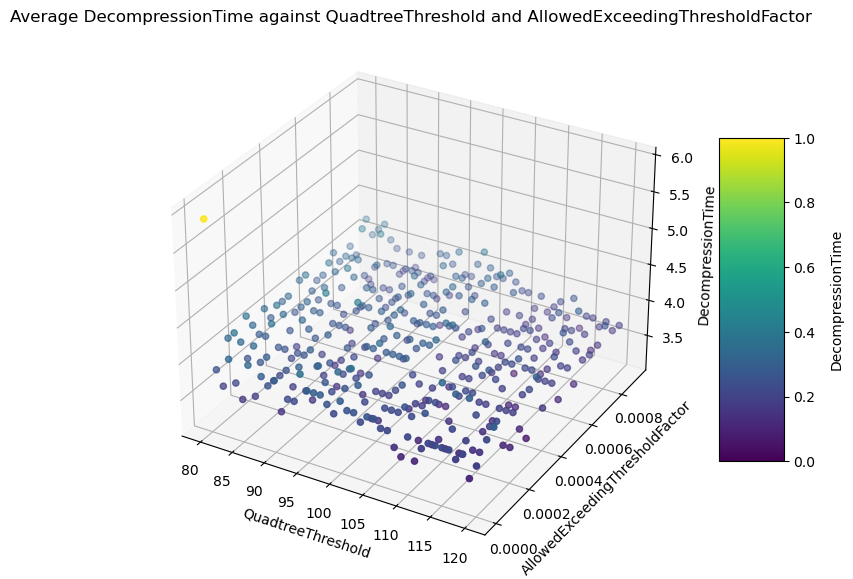

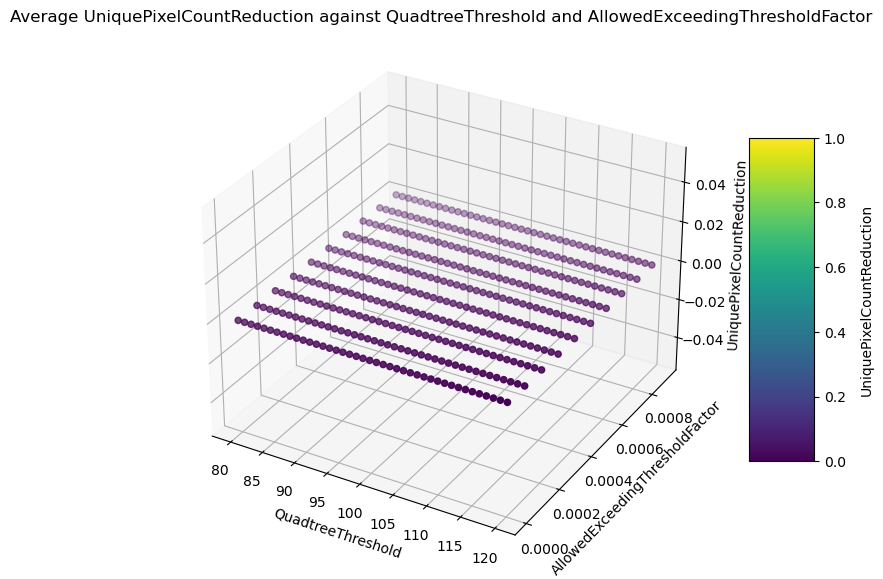

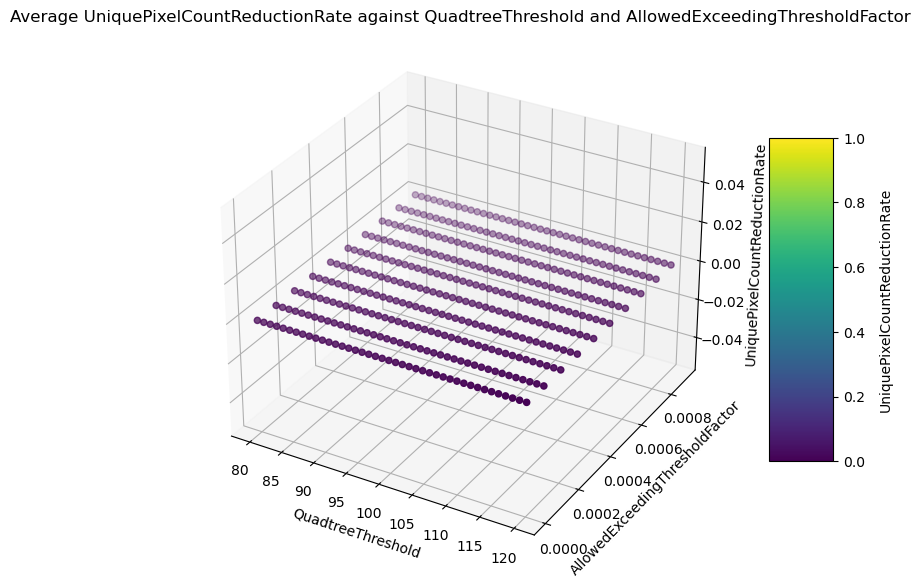

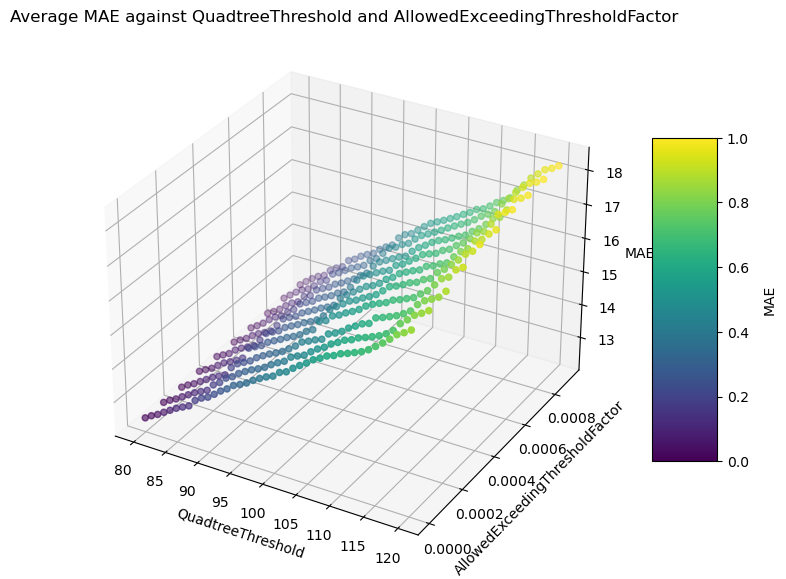

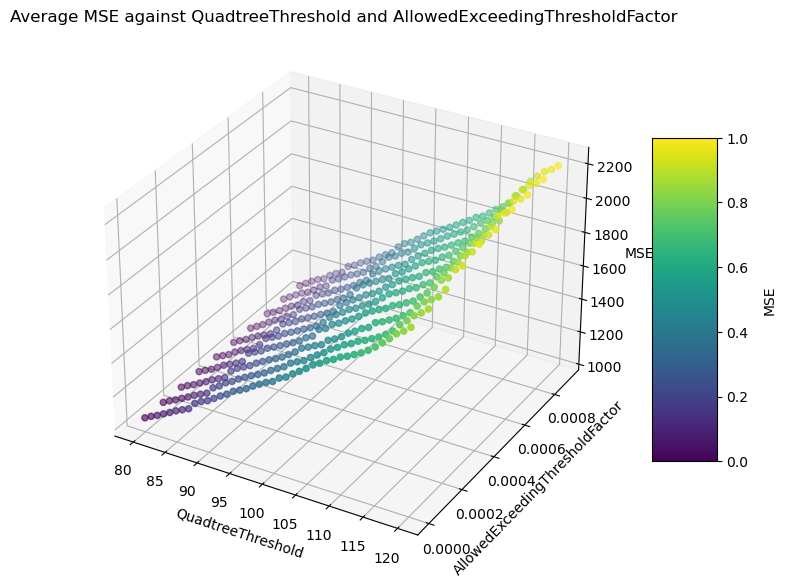

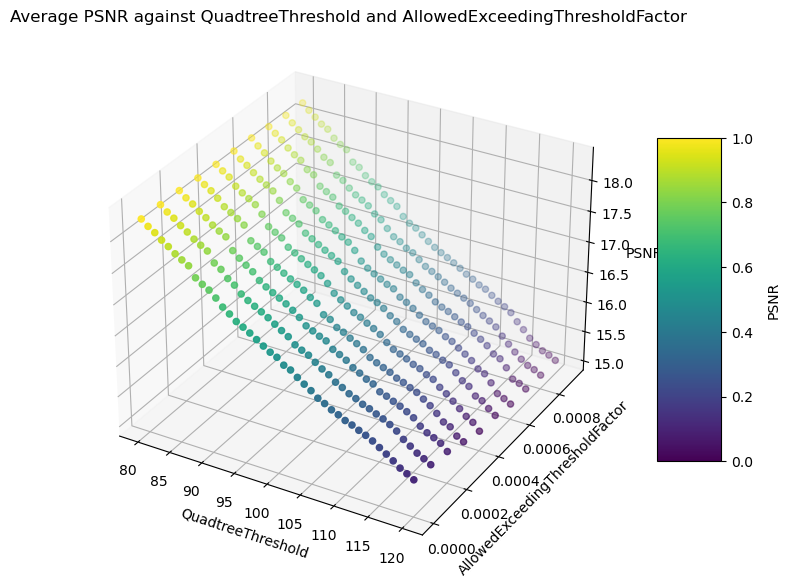

In [8]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


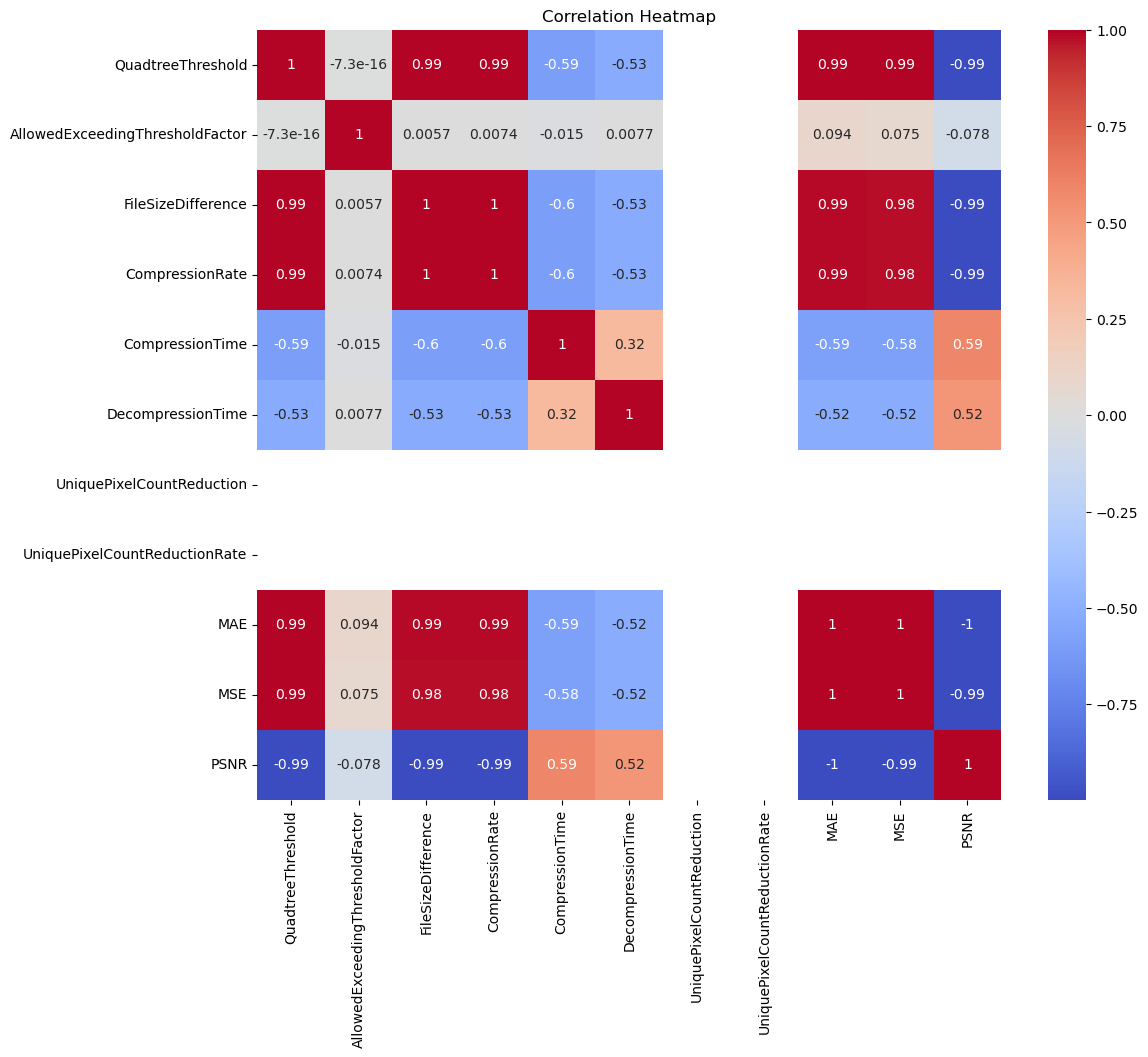

In [9]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [10]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

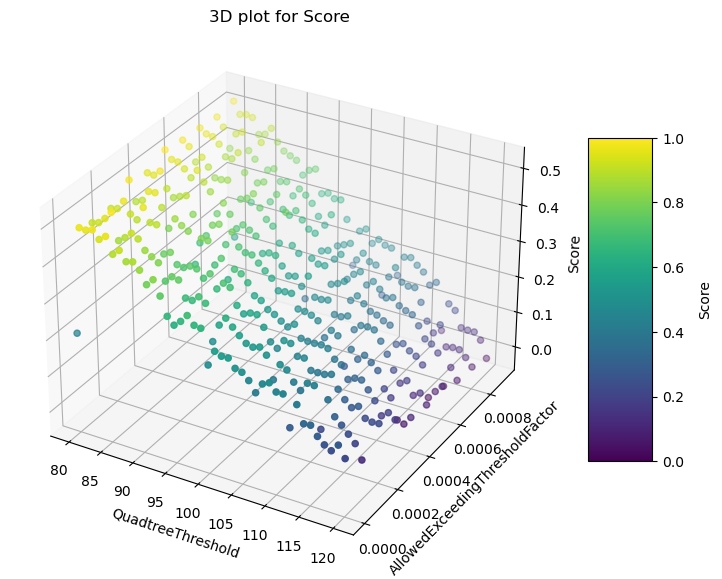

In [11]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

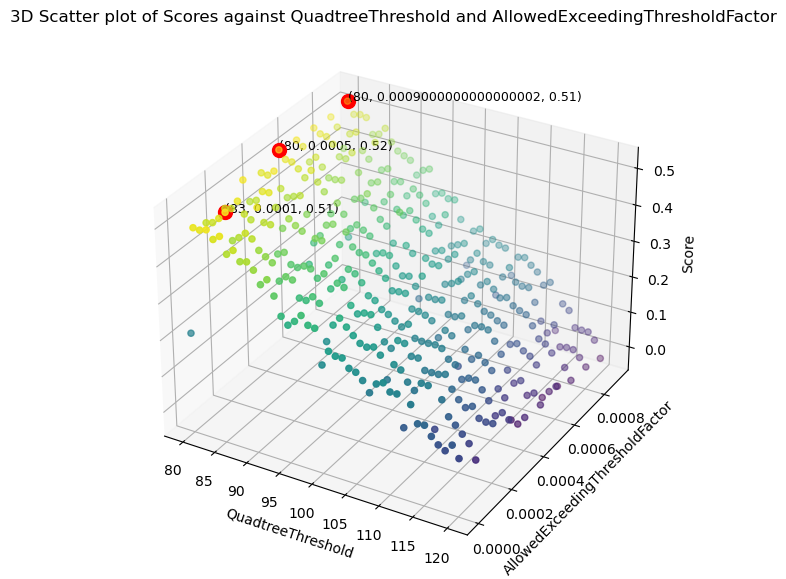

In [12]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [13]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
5                  80                           0.0005  0.516941
31                 83                           0.0001  0.511316
9                  80                           0.0009  0.510000


In [14]:
previous_optimal_reading = data_grouped_by_test[(data_grouped_by_test['QuadtreeThreshold'] == 120) & (data_grouped_by_test['AllowedExceedingThresholdFactor'] == 0.001)]

print(previous_optimal_reading[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])

Empty DataFrame
Columns: [QuadtreeThreshold, AllowedExceedingThresholdFactor, Score]
Index: []
